<a href="https://colab.research.google.com/github/vaddevamshi/Hand-Written-Digit-Prediction---Classification-Analysis/blob/main/Copy_of_hand_written_digit_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
digits.images.shape

(1797, 8, 8)

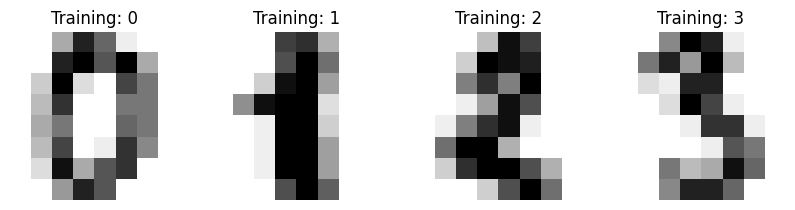

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, digits.data, digits.target):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

plt.show()

In [ ]:
digits.images[0]  # Access the images using the 'digits' variable

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
digits.images[0].shape  # Use 'digits' instead of 'df'

(8, 8)

In [ ]:
len(digits.images)  # Use 'digits' instead of 'df'

1797

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, 8, 8))

In [ ]:
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
data[0].shape

(8, 8)

In [ ]:
data.shape

(1797, 8, 8)

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data / 16.0

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([[0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ],
       [0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ],
       [0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ],
       [0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ],
       [0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=42)



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 8, 8), (540, 8, 8), (1257,), (540,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

RandomForestClassifier()

In [ ]:
X_test = X_test.reshape(X_test.shape[0], -1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

X_test = X_test.reshape(X_test.shape[0], -1)
y_pred = rf.predict(X_test) # Generate predictions using the fitted model

print(y_pred)

[6 9 3 7 2 2 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 1 5 5 1 5 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 2 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 4 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 3 7 7 1 3 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 48,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 64,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 56]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.96      0.96        50
           2       0.96      0.98      0.97        47
           3       0.98      0.94      0.96        54
           4       0.97      1.00      0.98        60
           5       0.94      0.97      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.98      0.95      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

